In [1]:
from transformers import GPT2Tokenizer, pipeline, GPT2LMHeadModel, GPT2Config

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
config = GPT2Config.from_json_file("./models/fine_tuned/config.json")
model = GPT2LMHeadModel.from_pretrained("./models/fine_tuned")

generate = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0
)

tx = generate("", max_length=30, num_return_sequences=1000)
print(tx)

/home/jae00yzha/anaconda3/envs/PK/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Trying to set a good example! SpaceX uses this exact product line &amp; line again today. Great respect for those trying to succeed.'}, {'generated_text': 'Thanksgiving is over! Tesla Team is making great progress. Looking forward to many opportunities to visit. Check our website for latest news. Merry X'}, {'generated_text': 'Tesla Solar Roof V2.0 with Smart Summon, Netflix &amp; Tesla phone app now in wide release. All in one package. You'}, {'generated_text': 'Cape &amp; Cape will be operational in two to three months, depending on demand. Cape will handle ventilators in continuous flow at'}, {'generated_text': 'Still loading... Super Heavy heavy load using Falcon Heavy engine. Launch attempt is postponed until June. Waiting on data transmission from satellite govt. SpaceX'}, {'generated_text': 'Tesla blog on Autopilot details new lower-cost version of new design that will be in wide release in wide release on next week. Worth'}, {'generated_text': 'Am noticing 

In [7]:
text = ''
for t in tx:
    text += t['generated_text'].replace('&amp', '')


In [8]:
import wordcloud

wc = wordcloud.WordCloud(
            width=900,
            height=900,
            background_color='white')
wc.generate(text)
wc.to_file(f'wordcloud/Musk_gen.png')

<BarContainer object of 100 artists>

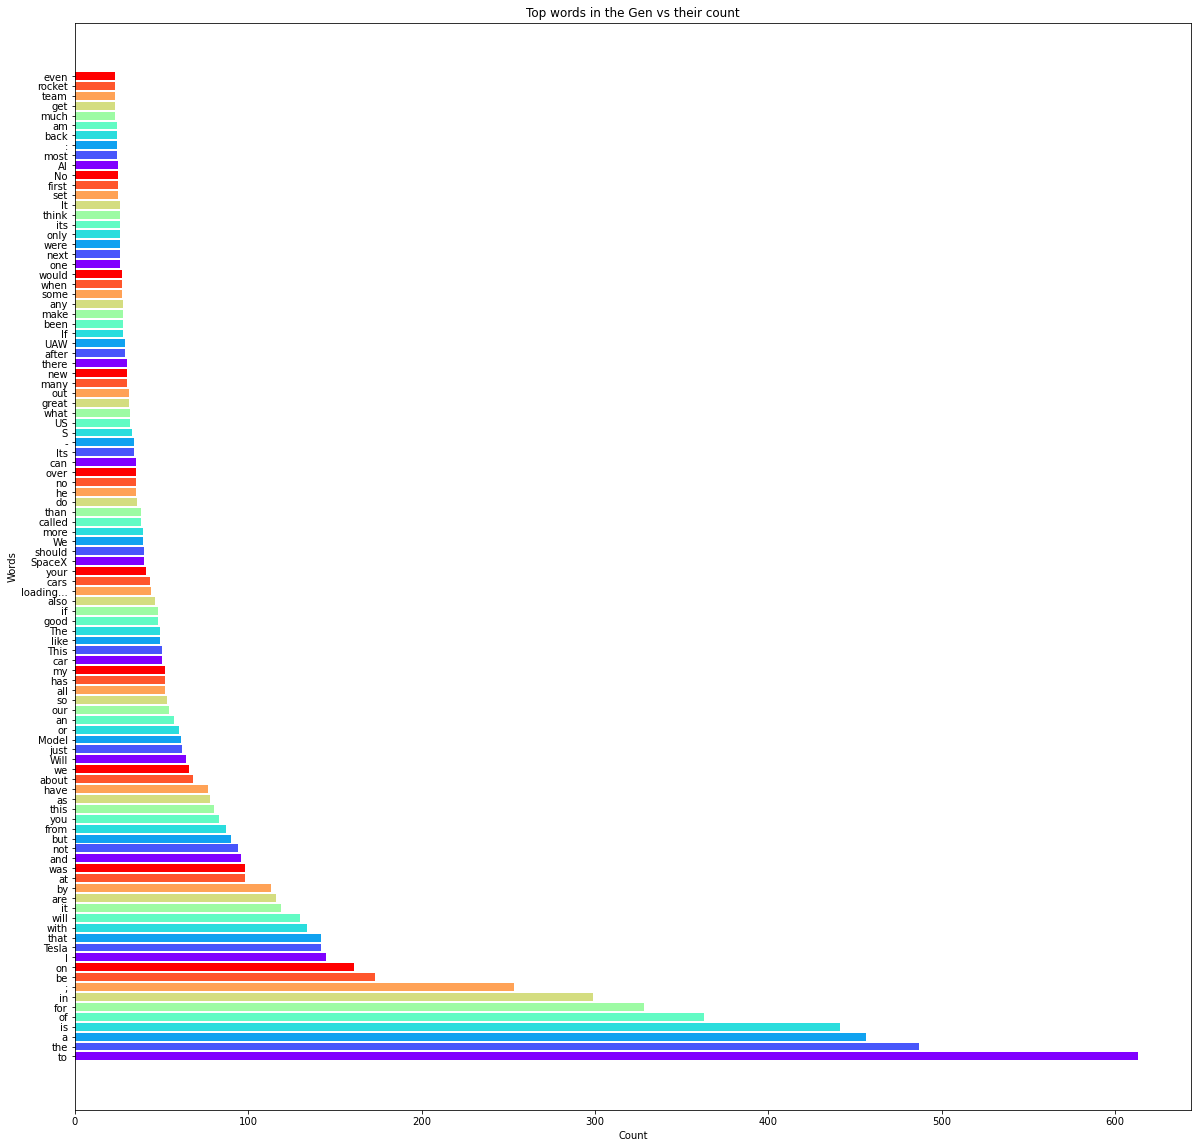

In [11]:
import matplotlib.cm as cm
import collections
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
#filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter([word for word in text.split()])

words = []
counts = []
for letter, count in counted_words.most_common(100):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 20

plt.title('Top words in the Gen vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)